# Crypto CTF 2024
##  Beheaded | Easy | 131 pts

Task description:

```
The beheaded flags have had their headers removed, making them encrypted. Can a living entity truly survive without a head?
```

Attachments:

`behead_me.sh`

```bash
#!/bin/bash

source secrets.sh

FLAGS="all_flags.txt"
rm -f "all_flags.enc"

while read flag; do
	magick -background white -fill blue -pointsize 72 -size "$X"x"$Y" -gravity North caption:"$flag" flag.ppm
	tail -n +4 flag.ppm > tail
	openssl enc -aes-256-ecb -pbkdf2 -nosalt -pass pass:"$KEY" -in tail >> "all_flags.enc"
done < "$FLAGS"
```

[all_flags.enc](./all_flags.enc)

## Solution

This challenge creates several(yeah...) images in `ppm` format. And encrypts them. Using ECB. Well, you know that picture 

![picture](https://upload.wikimedia.org/wikipedia/commons/c/c0/Tux_ECB.png)


The thing is, we do not know the dimensions of the images. Height is ok, nothing urgent here. But witdh is the key value here. 

In [2]:
!wc -c ./all_flags.enc

100691360 ./all_flags.enc


In [1]:
factor(100691360)

2^5 * 5 * 7 * 11^2 * 743

Doesn't look like a ppm... I can't see 6. 

Then we think of a padding. Ok let's check that

In [3]:
for i in range(1, 17):
    if (100691360 - i) % 6 == 0:
        print(factor(100691360 - i))

2 * 3 * 61 * 103 * 2671
2^3 * 3^2 * 67 * 20873
2 * 3 * 7 * 79 * 30347


That's more familiar. However it didn't help. So let's find the width manually. Using gimp.

First you should rename your file and give it extra `.data` extension. Otherwise gimp will not recognize it and won't open it.


After pushing the up arrow for a <b>while<b> I got the following width:

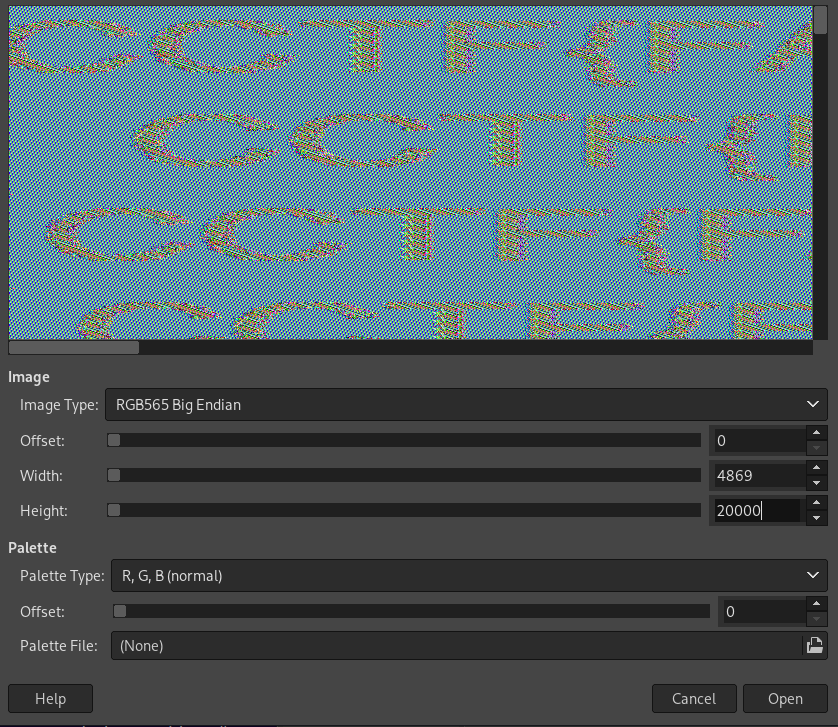

In [4]:
for i in range(1, 17):
    print((100691360 - i) % 4869)

439
438
437
436
435
434
433
432
431
430
429
428
427
426
425
424


I have no clue what happend, whatever.

After scrolling for a while you will notice a flag **among** the fake ones

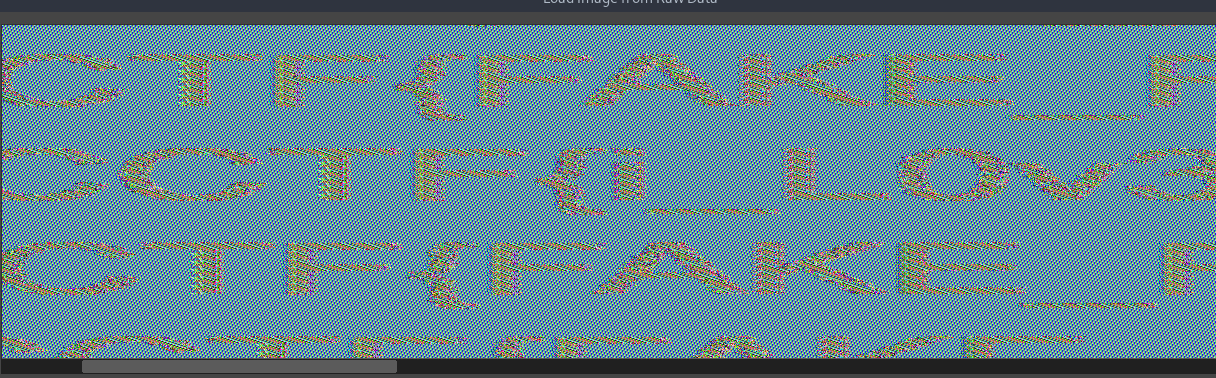

`CCTF{i_LOv3_7He_3C8_cRypTo__PnNgu1n!!}`